<h1>Testo Sensor Winchill Daten</h1>

The goal of this book is to show the data of the Winchill exports with OneHotEncoding

<h2>Datenextrahierung und Preprocessing</h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from preprocessor import Preprocessor

In [2]:
preprocessor = Preprocessor("../../cache")
df = preprocessor.process("TSGCableProbes")

just ran step read_from_windchill_per_node took 0:00:00.548785s
just ran step read_from_windchill_per_node took 0:00:00.926944s
just ran step read_from_windchill_per_node took 0:00:01.182151s
just ran step read_from_windchill_per_node took 0:00:01.710572s
just ran step read_from_windchill_per_node took 0:00:02.180102s
just ran step read_from_windchill_per_node took 0:00:02.357254s
just ran step read_from_windchill_per_node took 0:00:02.999946s
just ran step read_from_windchill_per_node took 0:00:03.191006s
just ran step read_from_windchill_per_node took 0:00:03.851453s
just ran step read_from_windchill_per_node took 0:00:04.474260s
just ran step read_from_windchill_per_node took 0:00:04.373344s
just ran step read_from_windchill_per_node took 0:00:04.989044s
just ran step read_from_windchill_per_node took 0:00:05.082297s
just ran step read_from_windchill_per_node took 0:00:05.865406s
just ran step read_from_windchill_per_node took 0:00:05.956761s
just ran step read_from_windchill_per_no

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SAPMATNR                     407 non-null    object 
 1   TSG.OuterDiameterSleeveTip   406 non-null    float64
 2   TSG.SensorType               406 non-null    object 
 3   TSG.OperatingTemperatureMax  407 non-null    int32  
 4   TSG.LengthCable              406 non-null    float64
 5   TSG.ConnectorType            407 non-null    object 
 6   TSG.LengthSleeve             406 non-null    float64
 7   TSG.OperatingTemperatureMin  407 non-null    int32  
 8   Sensorclass                  407 non-null    object 
dtypes: float64(3), int32(2), object(4)
memory usage: 25.6+ KB


In [4]:
df.columns

Index(['SAPMATNR', 'TSG.OuterDiameterSleeveTip', 'TSG.SensorType',
       'TSG.OperatingTemperatureMax', 'TSG.LengthCable', 'TSG.ConnectorType',
       'TSG.LengthSleeve', 'TSG.OperatingTemperatureMin', 'Sensorclass'],
      dtype='object')

In [5]:
df.head()

,SAPMATNR,TSG.OuterDiameterSleeveTip,TSG.SensorType,TSG.OperatingTemperatureMax,TSG.LengthCable,TSG.ConnectorType,TSG.LengthSleeve,TSG.OperatingTemperatureMin,Sensorclass
0,8070 1149,6.0,NTC,105,1960.0,Wieland_99.632.4542.0__surface_may_green_(simi...,40.0,-30,10
1,8022 1117,3.0,Pt,175,100.0,C4140HF-3P-GWT,30.0,-40,1000;classB
2,8022 1118,3.0,Pt,175,100.0,C4140HF-2P-GWT,30.0,-40,1000;classB
3,8022 1124,3.0,Pt,175,1120.0,C4140HF-3P-GWT,30.0,-40,1000;classB
4,8029 1103,3.7,NTC,155,600.0,-,230.0,0,10


In [6]:
df = df.drop("SAPMATNR", axis=1)

In [7]:
datatypes = df.dtypes
object_labels = datatypes[datatypes == 'object'].index.tolist()
object_labels

['TSG.SensorType', 'TSG.ConnectorType', 'Sensorclass']

In [8]:
preprocessed_data_oneHot = pd.get_dummies(df, columns=object_labels)
preprocessed_data_oneHot

,TSG.OuterDiameterSleeveTip,TSG.OperatingTemperatureMax,TSG.LengthCable,TSG.LengthSleeve,TSG.OperatingTemperatureMin,TSG.SensorType_Digital,TSG.SensorType_KTY,TSG.SensorType_NTC,TSG.SensorType_Pt,TSG.SensorType_Thermocouple,...,Sensorclass_20,"Sensorclass_20,000",Sensorclass_2000;classB,"Sensorclass_4,7",Sensorclass_5,Sensorclass_50,Sensorclass_500;classB,"Sensorclass_7,131",Sensorclass_81-110,Sensorclass_81-210
0,6.0,105,1960.0,40.0,-30,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,175,100.0,30.0,-40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,175,100.0,30.0,-40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,175,1120.0,30.0,-40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,3.7,155,600.0,230.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,3.0,70,2000.0,100.0,-30,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
403,6.0,200,2250.0,50.0,-30,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
404,6.0,90,5950.0,50.0,-20,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
405,5.0,80,145.0,20.0,-20,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:

label_encoder = preprocessing.LabelEncoder()

preprocessed_data_labelEncode = df.copy()
for i in object_labels:
    preprocessed_data_labelEncode[i] = label_encoder.fit_transform(preprocessed_data_labelEncode[i])
preprocessed_data_labelEncode

,TSG.OuterDiameterSleeveTip,TSG.SensorType,TSG.OperatingTemperatureMax,TSG.LengthCable,TSG.ConnectorType,TSG.LengthSleeve,TSG.OperatingTemperatureMin,Sensorclass
0,6.0,2,105,1960.0,63,40.0,-30,2
1,3.0,3,175,100.0,8,30.0,-40,5
2,3.0,3,175,100.0,6,30.0,-40,5
3,3.0,3,175,1120.0,8,30.0,-40,5
4,3.7,2,155,600.0,0,230.0,0,2
...,...,...,...,...,...,...,...,...
402,3.0,3,70,2000.0,0,100.0,-30,7
403,6.0,2,200,2250.0,0,50.0,-30,2
404,6.0,2,90,5950.0,0,50.0,-20,2
405,5.0,2,80,145.0,53,20.0,-20,2


<h3>Normalisierung</h3>

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
normalized_data = preprocessed_data_oneHot.copy()

numeric_columns = ["TSG.LengthSleeve","TSG.OuterDiameterSleeveTip","TSG.OperatingTemperatureMax","TSG.OperatingTemperatureMin","TSG.LengthCable"]

min_max_scaler.fit(normalized_data[numeric_columns])

normalized_data[numeric_columns] = min_max_scaler.transform(normalized_data[numeric_columns])

<h2>Visualisierung</h2>
<h3>2D</h3>

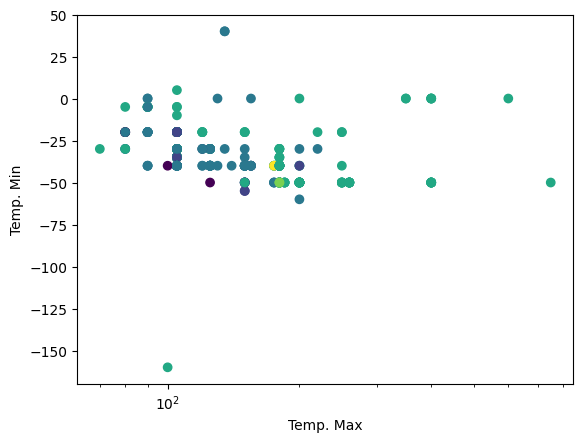

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(preprocessed_data_labelEncode["TSG.OperatingTemperatureMax"],preprocessed_data_labelEncode['TSG.OperatingTemperatureMin'], c=preprocessed_data_labelEncode["TSG.SensorType"])
ax.set_xscale('log')
ax.set_xlabel('Temp. Max')
ax.set_ylabel('Temp. Min')
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( preprocessed_data.drop("SAP_MATNR", axis=1), preprocessed_data["SAP_MATNR"], test_size = 0.3, random_state = 100)

In [13]:
""" for i in object_labels:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(preprocessed_data_X["Max.Einsatztemperatur [°C]"],preprocessed_data_X["Min.Einsatztemperatur [°C]"],preprocessed_data_X["Länge Leitung/Litze [mm]"] ,c=preprocessed_data_X[i])
    plt.title(i)
    ax.set_xlabel("Max.Einsatztemperatur [°C]")
    ax.set_ylabel("Min.Einsatztemperatur [°C]")
    ax.set_zlabel("Länge Leitung/Litze [mm]")
    plt.show() """

' for i in object_labels:\n    fig = plt.figure()\n    ax = fig.add_subplot(projection=\'3d\')\n    ax.scatter(preprocessed_data_X["Max.Einsatztemperatur [°C]"],preprocessed_data_X["Min.Einsatztemperatur [°C]"],preprocessed_data_X["Länge Leitung/Litze [mm]"] ,c=preprocessed_data_X[i])\n    plt.title(i)\n    ax.set_xlabel("Max.Einsatztemperatur [°C]")\n    ax.set_ylabel("Min.Einsatztemperatur [°C]")\n    ax.set_zlabel("Länge Leitung/Litze [mm]")\n    plt.show() '

In [14]:
""" for i in object_labels:
    fig = px.scatter_3d(normalized_data_X, x='Max.Einsatztemperatur [°C]', y="Min.Einsatztemperatur [°C]", z="Länge Leitung/Litze [mm]", color=i, log_y=True,log_x=True, log_z=True)
    fig.show() """

' for i in object_labels:\n    fig = px.scatter_3d(normalized_data_X, x=\'Max.Einsatztemperatur [°C]\', y="Min.Einsatztemperatur [°C]", z="Länge Leitung/Litze [mm]", color=i, log_y=True,log_x=True, log_z=True)\n    fig.show() '

<h3>Heatmap</h3>

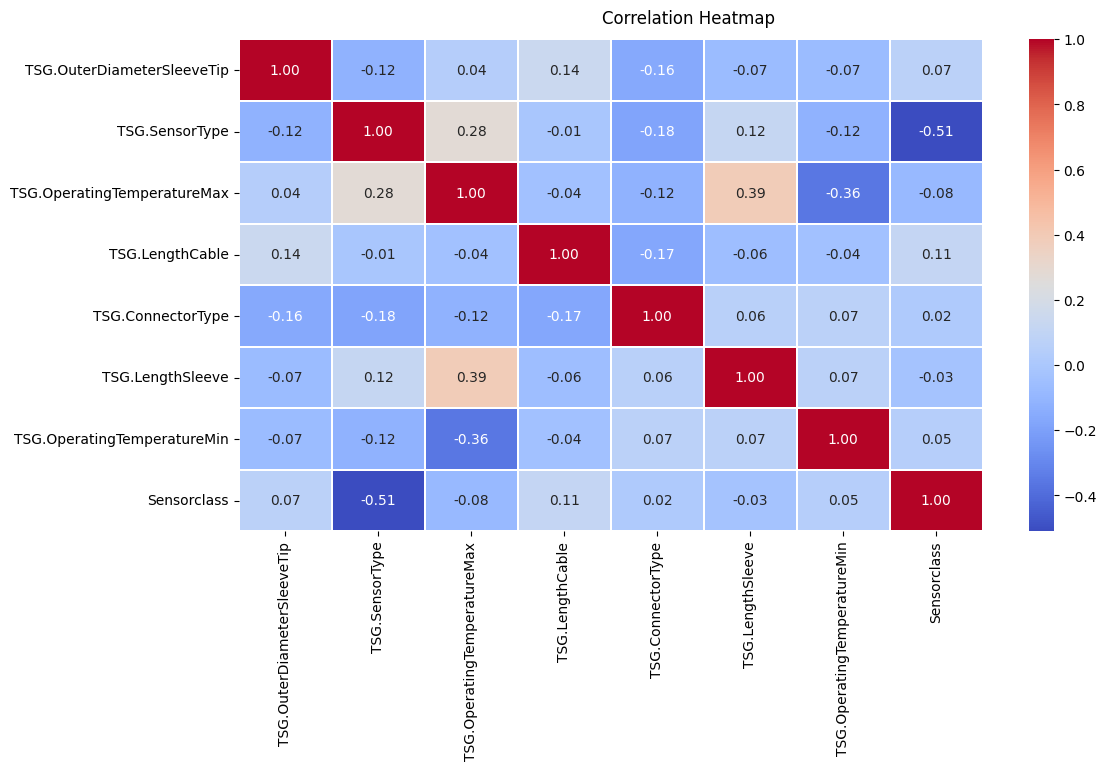

In [15]:
f, ax = plt.subplots(figsize=(12,6))
corr = preprocessed_data_labelEncode.corr()

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt=".2f", linewidths=.05)

f.subplots_adjust(top=0.93)

t = f.suptitle('Correlation Heatmap')

<h2>Clustering</h2>


In [16]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, rand_score

<h3>Unnormalisiert</h3>
<h4>Visualisierung</h4>

In [17]:
k_means = KMeans(n_clusters=2)
preprocessed_data_labelEncode=preprocessed_data_labelEncode.fillna(0)
k_means.fit(preprocessed_data_labelEncode)


KMeans(n_clusters=2)

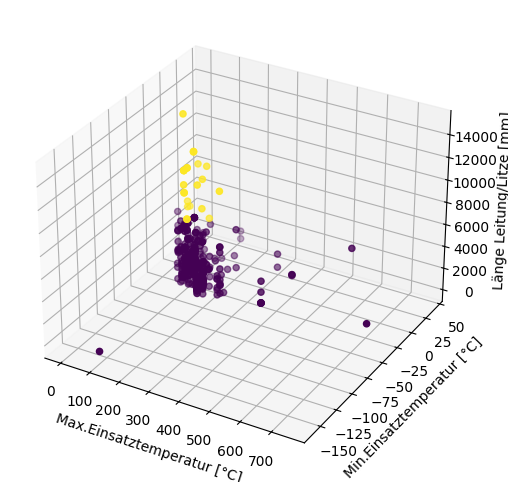

In [18]:
fig = plt.figure(figsize=(11, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter(preprocessed_data_labelEncode["TSG.OperatingTemperatureMax"],preprocessed_data_labelEncode["TSG.OperatingTemperatureMin"],preprocessed_data_labelEncode["TSG.LengthCable"] ,c=k_means.labels_)
ax.set_xlabel("Max.Einsatztemperatur [°C]")
ax.set_ylabel("Min.Einsatztemperatur [°C]")
ax.set_zlabel("Länge Leitung/Litze [mm]")
plt.show()

In [19]:
print("Silhouette ",silhouette_score(preprocessed_data_labelEncode, k_means.labels_))

Silhouette  0.7417481945189408


In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=4)
dbscan.fit(preprocessed_data_X)
#dbscan.labels_

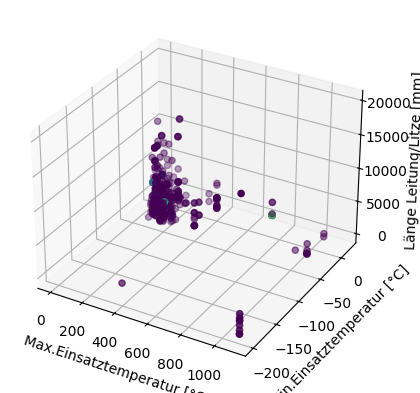

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(preprocessed_data_X["Max.Einsatztemperatur [°C]"],preprocessed_data_X["Min.Einsatztemperatur [°C]"],preprocessed_data_X["Länge Leitung/Litze [mm]"] ,c=dbscan.labels_)
ax.set_xlabel("Max.Einsatztemperatur [°C]")
ax.set_ylabel("Min.Einsatztemperatur [°C]")
ax.set_zlabel("Länge Leitung/Litze [mm]")
plt.show()

<h4>Evaluation<h4>

In [ ]:
print("DB score ",davies_bouldin_score(preprocessed_data_X, k_means.labels_))
print("Silhouette ",silhouette_score(preprocessed_data_X, k_means.labels_))

DB score  0.5428821380829386
Silhouette  0.567682296127106


In [ ]:
print("DB score ",davies_bouldin_score(preprocessed_data_X, dbscan.labels_))
print("Silhouette ",silhouette_score(preprocessed_data_X, dbscan.labels_))

DB score  2.064164595255922
Silhouette  -0.6365305644947412


<h3>Normalisiert</h3>
<h4>Visualisierung</h4>

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(normalized_data_X)
#k_means.labels_

KMeans(n_clusters=3)

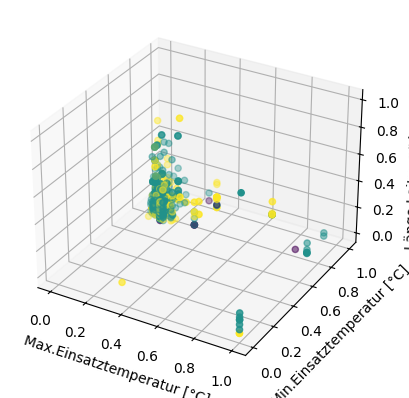

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(normalized_data_X["Max.Einsatztemperatur [°C]"],normalized_data_X["Min.Einsatztemperatur [°C]"],normalized_data_X["Länge Leitung/Litze [mm]"] ,c=k_means.labels_)
ax.set_xlabel("Max.Einsatztemperatur [°C]")
ax.set_ylabel("Min.Einsatztemperatur [°C]")
ax.set_zlabel("Länge Leitung/Litze [mm]")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=4)
dbscan.fit(normalized_data_X)
#dbscan.labels_

DBSCAN(eps=0.05, min_samples=4)

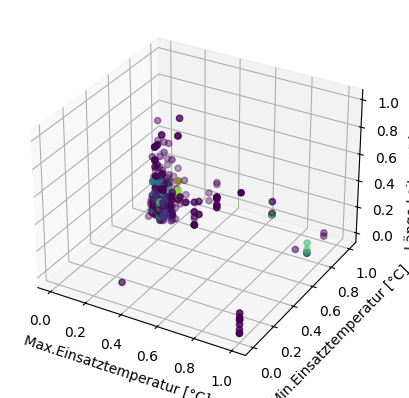

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(normalized_data_X["Max.Einsatztemperatur [°C]"],normalized_data_X["Min.Einsatztemperatur [°C]"],normalized_data_X["Länge Leitung/Litze [mm]"] ,c=dbscan.labels_)
ax.set_xlabel("Max.Einsatztemperatur [°C]")
ax.set_ylabel("Min.Einsatztemperatur [°C]")
ax.set_zlabel("Länge Leitung/Litze [mm]")
plt.show()

<h4>Evaluation</h4>

In [ ]:
print("DB score ",davies_bouldin_score(normalized_data_X, k_means.labels_))
print("Silhouette ",silhouette_score(normalized_data_X, k_means.labels_))

DB score  0.528590903884706
Silhouette  0.5977679503771621


In [ ]:
print("DB score ",davies_bouldin_score(normalized_data_X, dbscan.labels_))
print("Silhouette ",silhouette_score(normalized_data_X, dbscan.labels_))

DB score  6.362992692331336
Silhouette  -0.2941317628478547


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


In [ ]:
X_test.head()

In [ ]:
knn.predict(X_test)

In [ ]:
from scipy.spatial import distance
from sklearn.metrics import jaccard_score

In [ ]:
X_test.iloc[1]

In [ ]:
distances = []
for i in X_train:
    e_distance = 1 - jaccard_score(X_test.iloc[1],i)
    distances.append({i:e_distance})

In [ ]:
distances